# Group Assignment: Data Preparation and Visualization

## 1. Group members for group no. 30:

 Bingwen Liu<br> 
 Hemanth Sontineni<br>
 Sneha Mishra<br>
 Srishti Rath<br>
 Vedang Gupte<br>

***

## 2. Contribution report

After completing the assignment, please answer the following questions **as a group** by adding your answers within this markdown block.

1. In a few sentences, describe each group member's individual contributions to the submission. Be as specific as possible (e.g. coordinated group efforts, specific problems answered, specific problems reviewed/revised, sections of the submission written, etc.).

    
We initially met together and discussed the approach to queries and visualizations for all parts together. Thereafter, we divided the work as follows-
#### Sneha- Analysis, Querying and Visualizations for Part 1 <br>
#### Vedang, Srishti- Analysis, Querying and Visualizations for Part 2<br>
#### Bingwen, Hemanth- Analysis, Querying and Visualizations for Part 3 <br>

#### We also brain-stormed at the end together where each person contributed towards fixing the plots, drawing out insights and finalizing the entire assignment.

#### We each took up one question each for part 4. The division was as follows-
Q1- Vedang <br>
Q2- Srishti  <br>
Q3- Bingwen  <br>
Q4- Hemanth  <br>
Q5- Sneha  <br>


2. In a few sentences, describe what was learned in completing this assignment. In particular, describe what was learned through the **specific individual contributions** mentioned above.
    
#### Completing this assignment helped us understand a ton of things regarding requirements analysis and visualization. Some of our learnings are-

1) How to interpret business requirements as they might come from your manager or clients  <br>
2) Understanding how data is stored in RDBMS and the relations between data  <br>
3) Querying databases to fetch the required data for our needs <br>
4) Experiment with visualizations to see which charts and plot fit certain questions. Accurate representation of data by picking the best option among these.<br>
5) How to set labels, legends and titles for bar plots in an effective manner to give insightful visualizations.(Sneha) <br>
6) How to analyse the factors affecting best or worst performers in a category (Vedang, Srishti) <br>
7)How to create line charts and make presentable visualizations using seaborn( Vedang, Srishti) <br>
8) How to analyze correlation between various factors affecting target variable and forming hypothesis based on assumptions and possible insights.(Sneha) <br>
9) How to make scatter plot visualizations with presentable attributes (Hemanth, Bingwen) <br>
10) Analyzing historical trends and projections (Bingwen) <br>
11) Analyzing relations between sales of different products (Hemanth) <br>
***

## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker Compose directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. a single Jupyter Notebook (.ipynb).  **You must Run All cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. a PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [75]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

We are planning to expand our services in states with the highest sales amounts.  For our next shareholder meeting, we need to provide more information about sales performance at the state level and possible reasons why sales are lower in some states.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. Is sales performance by state associated with the types of products sold (scooter vs. automobile)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2017 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [76]:
#1.1 select query
query_1 = """
select state, cast(sum(sales_amount) as decimal (16,2)) as total_sales_amount
from sales as s
inner Join customers as c
using(customer_id)
where state is not null and s.sales_transaction_date >='01-01-2017'
group by state
order by total_sales_amount desc;
"""

In [77]:
#1.2 create dataframe
sales_by_state = pd.read_sql_query(query_1,engine)


In [78]:
#1.3 display top 5 performing states
sales_by_state[0:5]


,state,total_sales_amount
0,CA,15857815.99
1,TX,15425788.00
2,FL,10410607.25
3,NY,9523439.42
4,PA,5031834.85


In [79]:
#1.4 display bottom 5 performing states
sales_by_state[-5:]


,state,total_sales_amount
46,ME,36364.92
47,VT,30014.96
48,SD,24179.58
49,RI,6099.90
50,WY,3249.94


<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:title={'center':'Top 5 states for sales from Jan 1, 2017 to now'}, xlabel='state'>>

Text(0, 0.5, 'total_sales_amount')

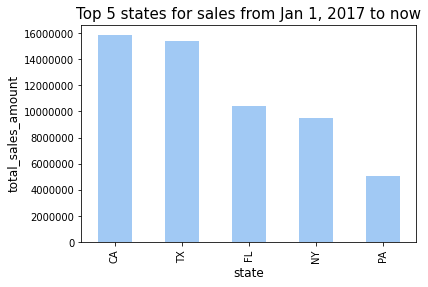

In [80]:
#1.5 visualize top and bottom performing states
#df_top_bottom = sales_by_state[0:5]+sales_by_state[-5:]
ax = sales_by_state[0:5].plot.bar('state', y='total_sales_amount', title='Top 5 states for sales from Jan 1, 2017 to now')
ax.title.set_size(15)
ax.set
ax.set_ylabel('total_sales_amount')
ax.yaxis.label.set_fontsize(12)
ax.xaxis.label.set_fontsize(12)
ax.ticklabel_format(style='plain', axis='y')
ax.get_legend().remove() 



Text(0, 0.5, 'total_sales_amount')

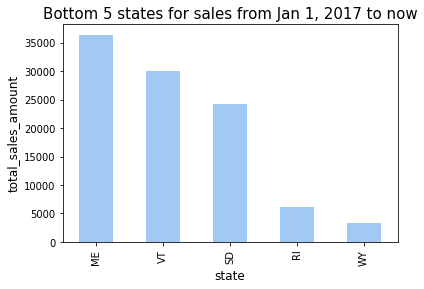

In [81]:
#1.5 visualize top and bottom performing states
#df_top_bottom = sales_by_state[0:5]+sales_by_state[-5:]
ax = sales_by_state[-5:].plot.bar('state', y='total_sales_amount', title='Bottom 5 states for sales from Jan 1, 2017 to now')
ax.title.set_size(15)
ax.set_ylabel('total_sales_amount')
ax.yaxis.label.set_fontsize(12)
ax.xaxis.label.set_fontsize(12)
ax.ticklabel_format(style='plain', axis='y')
ax.get_legend().remove() 

## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2017 to now.  Only include dealerships located in the *top two* states determined in Part 1.  To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2017 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, etc.). 

In [82]:
#2.1 select query
query_2 = """
SELECT d.dealership_id, DATE(sales_transaction_date) AS sales_transaction_date,
SUM(ROUND(CAST(sales_amount as DECIMAL), 2)) OVER(PARTITION BY d.dealership_id 
ORDER BY sales_transaction_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as cumulative_sales
FROM sales AS s 
RIGHT JOIN dealerships AS d
ON d.dealership_id = s.dealership_id
WHERE state in ('CA','TX') and sales_transaction_date >= '2017-01-01';
"""

In [83]:
#2.2 create dataframe
cumulative_sales_bydealership = pd.read_sql_query(query_2,engine)
cumulative_sales_bydealership.dealership_id = cumulative_sales_bydealership.dealership_id.astype('int').astype('string')
cumulative_sales_bydealership.sales_transaction_date = pd.to_datetime(cumulative_sales_bydealership.sales_transaction_date).dt.date.astype( 'datetime64[ns]' )

[Text(0.5, 0, 'sales_transaction_date'),
 Text(0, 0.5, 'cumulative_sales'),
 Text(0.5, 1.0, 'Historical cumulative sales of dealerships in CA, TX')]

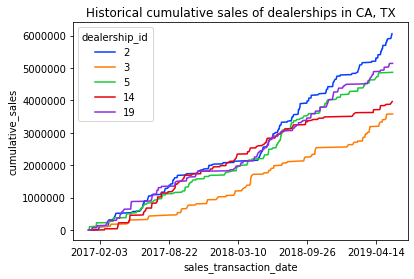

In [84]:
#2.3 visualization
import matplotlib.ticker as mticker
ax=sns.lineplot(x='sales_transaction_date', y='cumulative_sales', hue='dealership_id', 
             data=cumulative_sales_bydealership,palette="bright")
sns.set_palette("pastel")
 # add label to the axis and label to the plot
ax.set(xlabel ="sales_transaction_date", ylabel = "cumulative_sales", title ='Historical cumulative sales of dealerships in CA, TX')
#ax.set_xticklabels( ax.get_xticklabels(), rotation=45 )
#ax.set_xticklabels(cumulative_sales_bydealership.sales_transaction_date.dt.date, rotation=90)
#ax.ticklabel_format(style='plain', axis='y')
ax.legend(title='dealership_id')
ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#ax.set_xticklabels([label_format.format(x) for x in ticks_loc])
ax.yaxis.get_major_formatter().set_scientific(False)

## Part 3: Product mix and sales

Create tables and visualizations to compare the proportion of scooter sales with total sales amount by state for sales from January 2017 to now. To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `state`,`prop_scooters`, and `total_sales`.  `prop_scooters` represents the proportion of scooter sales out of all sales made from January 2017 to now, `total_sales` represents the total sales amount from January 1, 2017 to now.  There should be one row for each state *and no more*.
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `prop_scoot`.
    
    
   3. Appropriately visualize the relationship between proportion of scooter sales and total sales *in a single plot*. Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

In [85]:
#3.1 select query
query_3 = """
 with CTE_1 as
  (
  SELECT state,CAST(count(product_type) AS DECIMAL) as scooters
  FROM customers as c 
  RIGHT JOIN sales as s
  ON c.customer_id=s.customer_id
  LEFT JOIN products as p
  ON s.product_id = p.product_id
  WHERE (p.product_type='scooter') and (s.sales_transaction_date >= '2017-01-01') 
 GROUP BY state
  ),
  CTE_2 as
  (
  SELECT state, CAST(count(product_type) AS DECIMAL) as allproducts,
  SUM(s.sales_amount) AS total_sales
  FROM customers AS c 
  RIGHT JOIN sales AS s
  on c.customer_id = s.customer_id
  LEFT JOIN products AS p
  ON s.product_id = p.product_id
  WHERE s.sales_transaction_date >= '2017-01-01' 
  GROUP BY state
  )
  SELECT CTE_1.state, (CTE_1.scooters)/(CTE_2.allproducts) AS prop_scooters, ROUND(CAST(CTE_2.total_sales as DECIMAL),2) AS total_sales
  FROM CTE_1
  RIGHT JOIN CTE_2
  ON CTE_1.state  = CTE_2.state
  ORDER BY prop_scooters
"""

In [86]:
#3.2 create data frame
prop_scoot = pd.read_sql_query(query_3,engine)
prop_scoot=prop_scoot.dropna()

prop_scoot

,state,prop_scooters,total_sales
0,VT,0.800000,30014.96
1,DE,0.823529,578364.60
2,NH,0.852941,371714.72
3,AR,0.854369,997384.16
4,WI,0.856459,2063418.28
5,WV,0.861244,2133073.28
6,KY,0.872587,2148697.84
7,NC,0.879747,3575996.01
8,MO,0.881607,4002390.99
9,ND,0.882353,415769.71


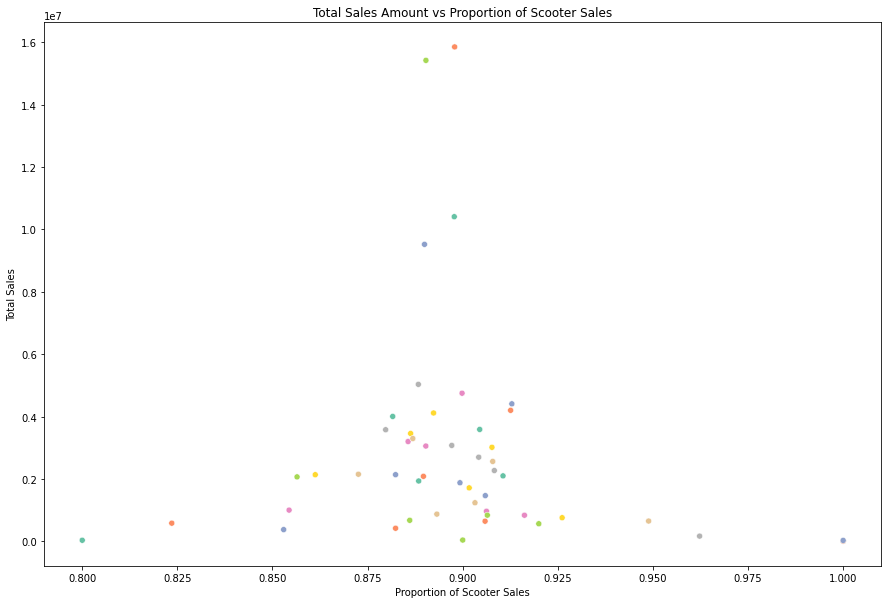

In [87]:
#3.3 visualization
mytext = plt.figure(figsize=(15,10))
ax=sns.scatterplot(data=prop_scoot, 
             x="prop_scooters", 
             y="total_sales", hue="state", 
             palette = 'Set2', legend = False).set(title='Total Sales Amount vs Proportion of Scooter Sales',
                                           xlabel='Proportion of Scooter Sales', ylabel='Total Sales')


## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How would you describe the relationship between product mix (i.e. proportion of scooters sold) and total sales?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims.

   
   5. (Part 3): What are some potential hypotheses as to why product mix and sales are related in the manner described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

< After our analysis, we saw that the top 5 performing states were CA, TX, FL, NY and PA. There are a number of possible reasons for this. Firstly, these 5 states are the 5 most populous states in the U.S. It can be assumed that due to the large population, it is natural that sales will be higher. Secondly, these are also some of the richest states with the highest GDPs. The average person in these states is more likely to be able to afford vehicles, and even spend relatively more on such purchases. Next, it is possible that there are more dealerships in these areas due to the other factors mentioned above. More dealerships would be effective at bringing in more sales. To test these hypotheses, it is important to take a look at the number of dealerships in these regions. We can also see the trends of people buying cars compared to other states, which could have resulted in more allocation to these states. A further study of the income demographics can help answer whether affordability is a factor. Next, there is a possibility that the people in these states prefer personal vehicles over public infrastructure. An analysis of the percentage of population willing to travel by other means could shed more light on this. >







 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

< After our analysis, we saw that the bottom 5 performing states were ME, VT, SD, RI and WY. There are multiple reasons.
1) These 5 states are the 5 least populated states in the U.S. It can be assumed that due to the small population, it is natural that sales will be least. <br>
2)  There are less dealerships in these areas and less dealerships would be equal to bringing in less sales.<br>
3) These are also some of the poorest states with the least GDPs.<br>
4) Even checking whether the public transportation is good and highly convenient can make a difference to this analysis.<br>
Further analysis of the income differences can shed light on the fact whether people can afford vehicles and would want to travel by personal vehicles. <br>

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 


< From Part 1 of this assignment, CA and TX are top two states in sales performance from January 1, 2017 to now. For the dealerships in the aforementioned states, we plotted their historical cumulative sales amounts along this time course. cumulative_sales of all dealerships growed roughly linearly along date course.   It shows steady business of motor sales in these two states in this period. cumulative_sales of most dealers obviously bent up in 2018 and such a trend continued later on. Associated Press reported that "strong economic fundamentals pushed up (motor) sales" in 2018. Dealerships 14 performed slightly poorly.This might be affected by geographic factors (like rural areas) or their sales skills.>

 4. (Part 3):  How would you describe the relationship between product mix (i.e. proportion of scooters sold) and total sales?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims.


< After visualization we can see that the proportion of scooters is scattered between 0.88 and 0.91 i.e. maximum sales are observed when the proportion is in between 0.88 and 0.91. Sales are least when the proportion of scooters is either the least value i.e. 0.82 or highest value i.e. 0.95 and also proportion says that max proportion of total sales are scooters as most of them prefer scooters over other vehicles. >

 5. (Part 3): What are some potential hypotheses as to why product mix and sales are related in the manner described in 5?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

< From the 4th question, we can infer that sale of scooters account for the majority of sales for all the states. That is on an average, scooter sales account for 89.9% of all the sales per state, as per the descriptive statistics summary obtained from the proportion column of our dataframe. Some potential hypothesis for scooter sales representing a major portion of the dealership business can be per captia income of each household, average age group of population, people's preference of type of vehicle as a means of transportation, road infrastructure, to name a few. We can verify this hypothesis by performing exploratory data analysis on various demographic surveys, census data, or some other public surveys conducted by govt. or private institutions. This will give us meaningful insights on the correlation between the various factors connected to the scooter sales in the states. >